# CREDIT CARD FRAUD DETECTION
 Step 1: Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split   # Data splitting
from sklearn.preprocessing import StandardScaler   # Feature scaling
from sklearn.ensemble import RandomForestClassifier # Random Forest model
from sklearn.metrics import classification_report, confusion_matrix   # Model evaluation metrics
from imblearn.over_sampling import SMOTE   # Handling class imbalance

Step 2: Load Dataset

In [2]:
df = pd.read_csv('creditcard.csv')  # Download from Kaggle & put it in same folder
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


Step 3: Basic Exploration

In [3]:
print("Shape of data:", df.shape)
print("Fraudulent Transactions (%):", round((df['Class'].value_counts()[1]/len(df))*100, 2), "%")

Shape of data: (284807, 31)
Fraudulent Transactions (%): 0.17 %


Step 4: Check for Missing Values

In [ ]:
print(df.isnull().sum())   # Check for missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Step 5: Visualizing Class Imbalance

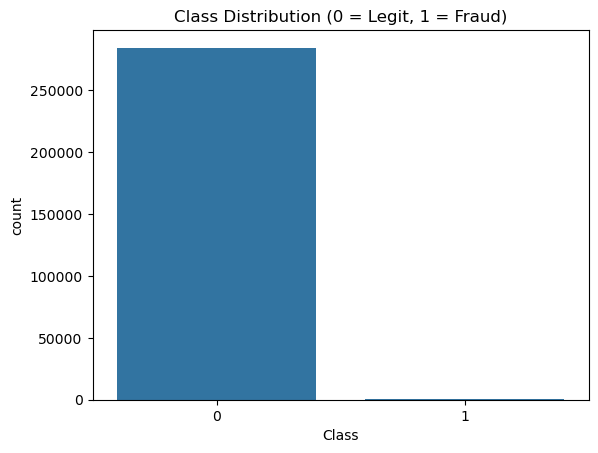

In [ ]:
sns.countplot(x='Class', data=df)   # Visualizing class distribution
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()


Step 6: Transaction Amount Distribution

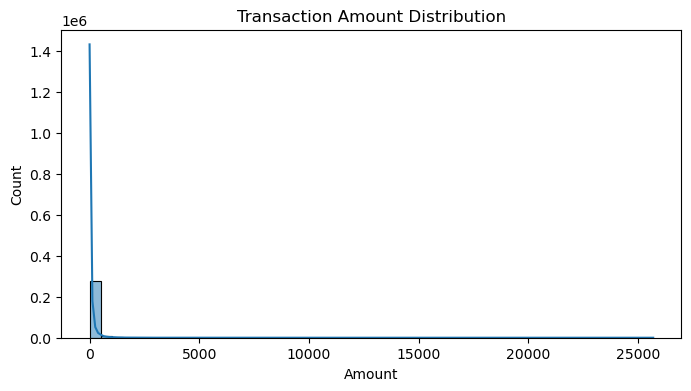

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50, kde=True)  # Visualizing transaction amount distribution
plt.title("Transaction Amount Distribution")                                        
plt.show()

Step 7: Normalize 'Amount' Feature

In [ ]:
scaler = StandardScaler()  # Feature scaling
df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))  # Normalizing the 'Amount' feature
df.drop(['Amount', 'Time'], axis=1, inplace=True)  # Dropping 'Amount' and 'Time' columns

Step 8: Prepare Data for Training

In [ ]:
X = df.drop('Class', axis=1)  # Features
y = df['Class']

Step 9: Handle Imbalanced Dataset Using SMOTE

In [ ]:
print("Before SMOTE:", y.value_counts())            # Checking class distribution
sm = SMOTE(random_state=42)                         # Applying SMOTE to handle class imbalance
X_res, y_res = sm.fit_resample(X, y)
print("After SMOTE:", y_res.value_counts())

Before SMOTE: Class
0    284315
1       492
Name: count, dtype: int64
After SMOTE: Class
0    284315
1    284315
Name: count, dtype: int64


Step 10: Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)       # Splitting the dataset into training and testing sets

Step 11: Train Model

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initializing the Random Forest model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Step 12: Evaluate Model

In [ ]:
y_pred = model.predict(X_test)  # Making predictions on the test set
print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Evaluating the model performance
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))   # Displaying the confusion matrix


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Confusion Matrix:
 [[56738    12]
 [    0 56976]]


Step 13: Feature Importance

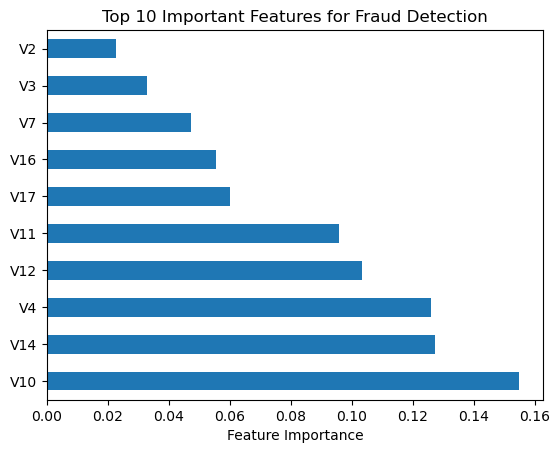

In [14]:
importances = pd.Series(model.feature_importances_, index=X.columns)  
importances.nlargest(10).plot(kind='barh')   # Plotting top 10 important features
plt.xlabel("Feature Importance") 
plt.title("Top 10 Important Features for Fraud Detection")
plt.show()